# Weight distance versus function distance scatterplot

1. Sample a neural network with uniform random weights. Number of weights is $W$.
2. Sample vector of size $W$ with i.i.d. normally distributed elements. This is a noise vector.
3. Scale the noise vector to a particular length.
4. Create a new neural net whose weights are the first neural network's plus the noise vector.
5. Compute the functional distance between the two neural networks.
6. Plot weight distance versus functional distance.


## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import random
N=10 #input dimension

## Experiment

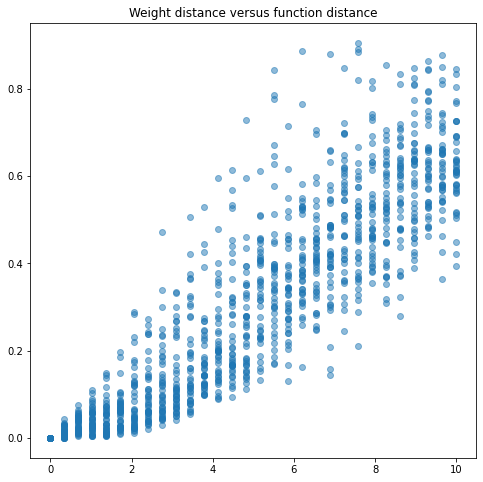

In [ ]:
def FunctionDistance(nn1, nn2):  
  fd = 0.
  for _ in range(10):
    inpt = tf.random.uniform(shape=(1000,N),minval=-1.,maxval=1.)
    fd += tf.math.reduce_mean(tf.abs(nn1(inpt)-nn2(inpt))).numpy()
  fd = fd/10.
  return fd


fds = {}
for d in np.linspace(0,10,30):
  fds[d]=[]
  for TRIALS in range(40):
    
    nn1 = tf.keras.Sequential([    
      tf.keras.layers.Dense(16, input_shape=(N,), activation='tanh', kernel_initializer='random_uniform'),
      tf.keras.layers.Dense(16, activation='tanh', kernel_initializer='random_uniform'),      
      tf.keras.layers.Dense(1, activation='tanh', kernel_initializer='random_uniform')
    ])

    nn2 = tf.keras.Sequential([    
      tf.keras.layers.Dense(16, input_shape=(N,), activation='tanh', kernel_initializer='random_uniform'),
      tf.keras.layers.Dense(16, activation='tanh', kernel_initializer='random_uniform'),      
      tf.keras.layers.Dense(1, activation='tanh', kernel_initializer='random_uniform')
    ])

    number_params = nn1.count_params()


    # Get random vector of length d
    p = np.random.standard_normal(size=(number_params,))
    p = p / np.linalg.norm(p)
    p = p * d    


    # Set nn2 weights    
    offset = 0
    for layer1, layer2 in zip(nn1.layers, nn2.layers):
      l1w, l1b = layer1.get_weights()
      wshape = l1w.shape
      bshape = l1b.shape
      l1w = l1w.flatten()
      l1b = l1b.flatten()
      o1 = l1w.shape[0]
      o2 = l1b.shape[0]
      l2w = l1w + p[offset:offset+o1]
      offset+=o1
      l2b = l1b + p[offset:offset+o2]
      offset+=o2
      layer2.set_weights([l2w.reshape(wshape), l2b.reshape(bshape)])

    fds[d].append(FunctionDistance(nn1, nn2))


xs = []
ys = []

for k,v in fds.items():
  for value in v:
    xs.append(k)
    ys.append(value)


fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title('Weight distance versus function distance')
ax1.scatter(xs,ys,alpha=0.5)
plt.show()


###Larger networks

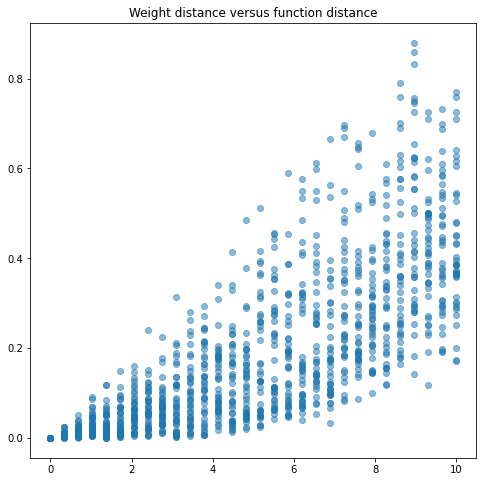

In [ ]:
def FunctionDistance(nn1, nn2):  
  fd = 0.
  for _ in range(10):
    inpt = tf.random.uniform(shape=(1000,N),minval=-1.,maxval=1.)
    fd += tf.math.reduce_mean(tf.abs(nn1(inpt)-nn2(inpt))).numpy()
  fd = fd/10.
  return fd


fds = {}
for d in np.linspace(0,10,30):
  fds[d]=[]
  for TRIALS in range(40):
    
    nn1 = tf.keras.Sequential([    
      tf.keras.layers.Dense(16, input_shape=(N,), activation='tanh', kernel_initializer='random_uniform'),
      tf.keras.layers.Dense(16, activation='tanh', kernel_initializer='random_uniform'),      
      tf.keras.layers.Dense(16, activation='tanh', kernel_initializer='random_uniform'),      
      tf.keras.layers.Dense(16, activation='tanh', kernel_initializer='random_uniform'),      
      tf.keras.layers.Dense(1, activation='tanh', kernel_initializer='random_uniform')
    ])

    nn2 = tf.keras.Sequential([    
      tf.keras.layers.Dense(16, input_shape=(N,), activation='tanh', kernel_initializer='random_uniform'),
      tf.keras.layers.Dense(16, activation='tanh', kernel_initializer='random_uniform'),      
      tf.keras.layers.Dense(16, activation='tanh', kernel_initializer='random_uniform'),      
      tf.keras.layers.Dense(16, activation='tanh', kernel_initializer='random_uniform'),      
      tf.keras.layers.Dense(1, activation='tanh', kernel_initializer='random_uniform')
    ])

    number_params = nn1.count_params()


    # Get random vector of length d
    p = np.random.standard_normal(size=(number_params,))
    p = p / np.linalg.norm(p)
    p = p * d    


    # Set nn2 weights    
    offset = 0
    for layer1, layer2 in zip(nn1.layers, nn2.layers):
      l1w, l1b = layer1.get_weights()
      wshape = l1w.shape
      bshape = l1b.shape
      l1w = l1w.flatten()
      l1b = l1b.flatten()
      o1 = l1w.shape[0]
      o2 = l1b.shape[0]
      l2w = l1w + p[offset:offset+o1]
      offset+=o1
      l2b = l1b + p[offset:offset+o2]
      offset+=o2
      layer2.set_weights([l2w.reshape(wshape), l2b.reshape(bshape)])

    fds[d].append(FunctionDistance(nn1, nn2))


xs = []
ys = []

for k,v in fds.items():
  for value in v:
    xs.append(k)
    ys.append(value)


fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.set_title('Weight distance versus function distance')
ax1.scatter(xs,ys,alpha=0.5)
plt.show()
